In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data set
df=pd.read_csv('stud.csv')


In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [7]:
#check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
##insights or obervation
#there are no missing values

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
#check duplicats
df.duplicated().sum()

0

In [11]:
##there is no duplicats in the dataset

In [12]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
#checking the number of uniques values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [14]:
#check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
#insights or obervation
#from the above decription of numberical data all mean are very close to each other between 66 and 69
#all the standard deviation are also close between 14.6-15-19
#while there is a minimum of 0 for maths other are having 17 and 10 value

In [16]:
#explore more info about data

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
#segrregate numberical and categorical features.
numberical_features=[feature for feature in df.columns if df[feature].dtype!='0']

In [31]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='0']

In [32]:
categorical_features

[]

In [29]:
numberical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [83]:
#aggregat the total score with mean
df['total_Score']=(df['math_score']+df['reading_score']+df['writing_score'])

In [84]:
df['average']=df['total_Score']/3

In [85]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_Score,total_score,averge,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,76.333333,76.333333


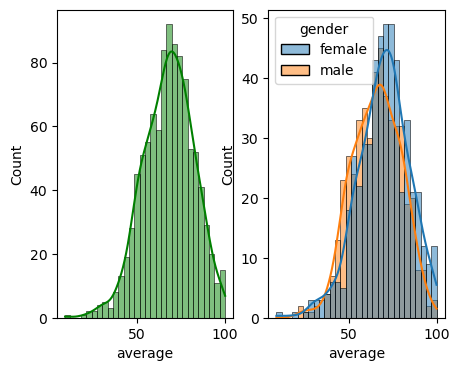

In [86]:
#explore more visualization(based on the gender)
fig,axis=plt.subplots(1,2,figsize=(5,4))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()

In [87]:
#insight
#female student tend to perform well than the  male student

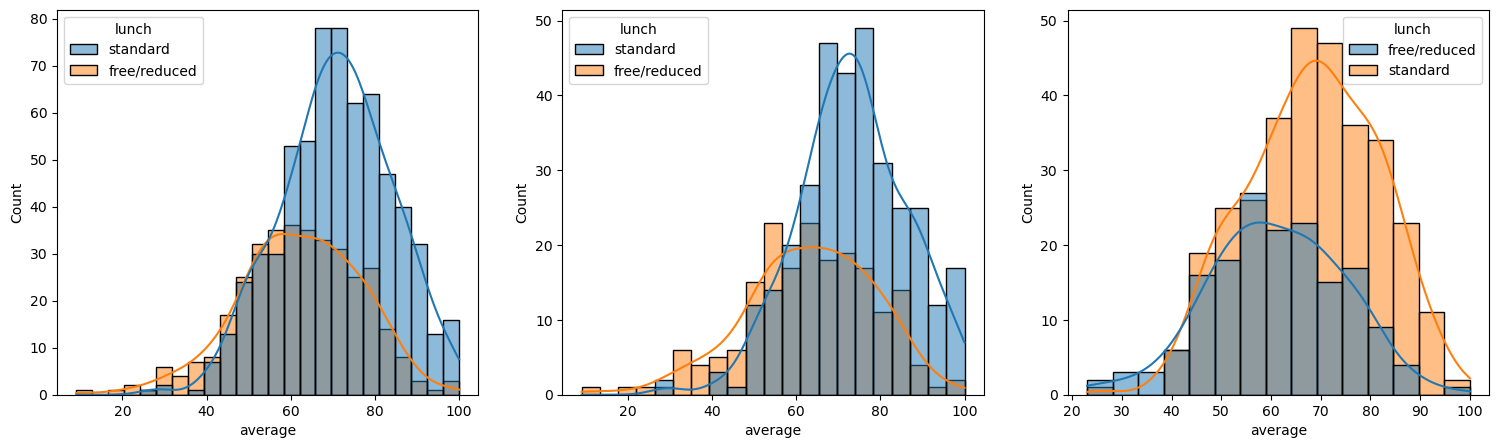

In [93]:
#explore more visualization(based on the meals)
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

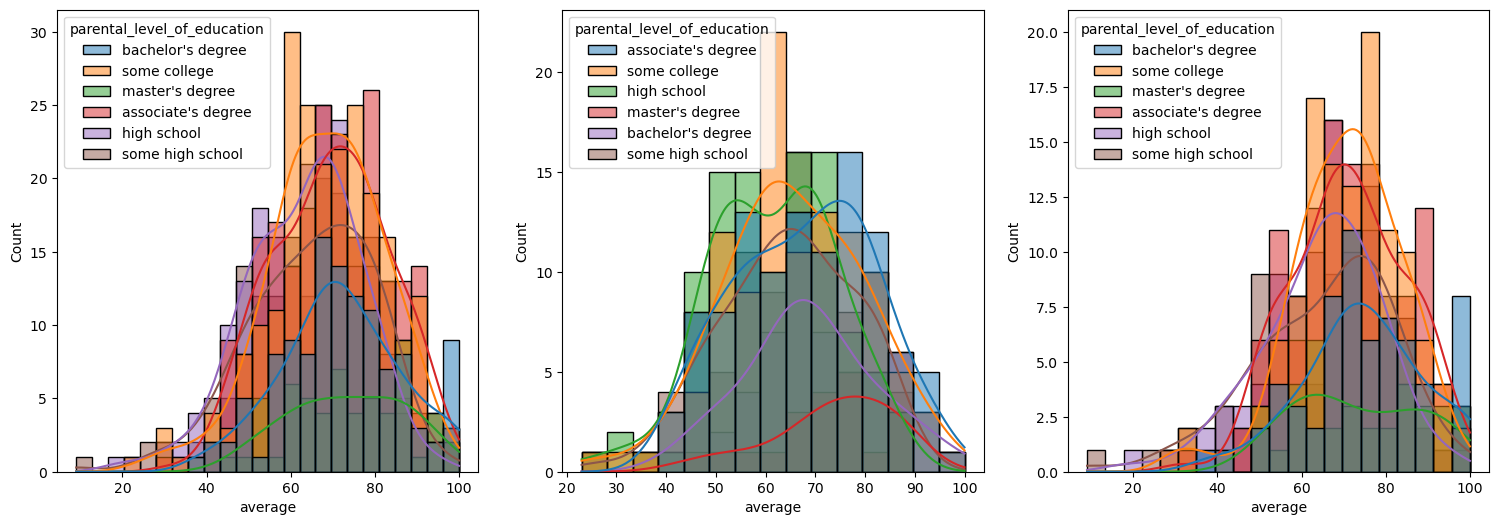

In [94]:
#explore more visualization(based on level of education)
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

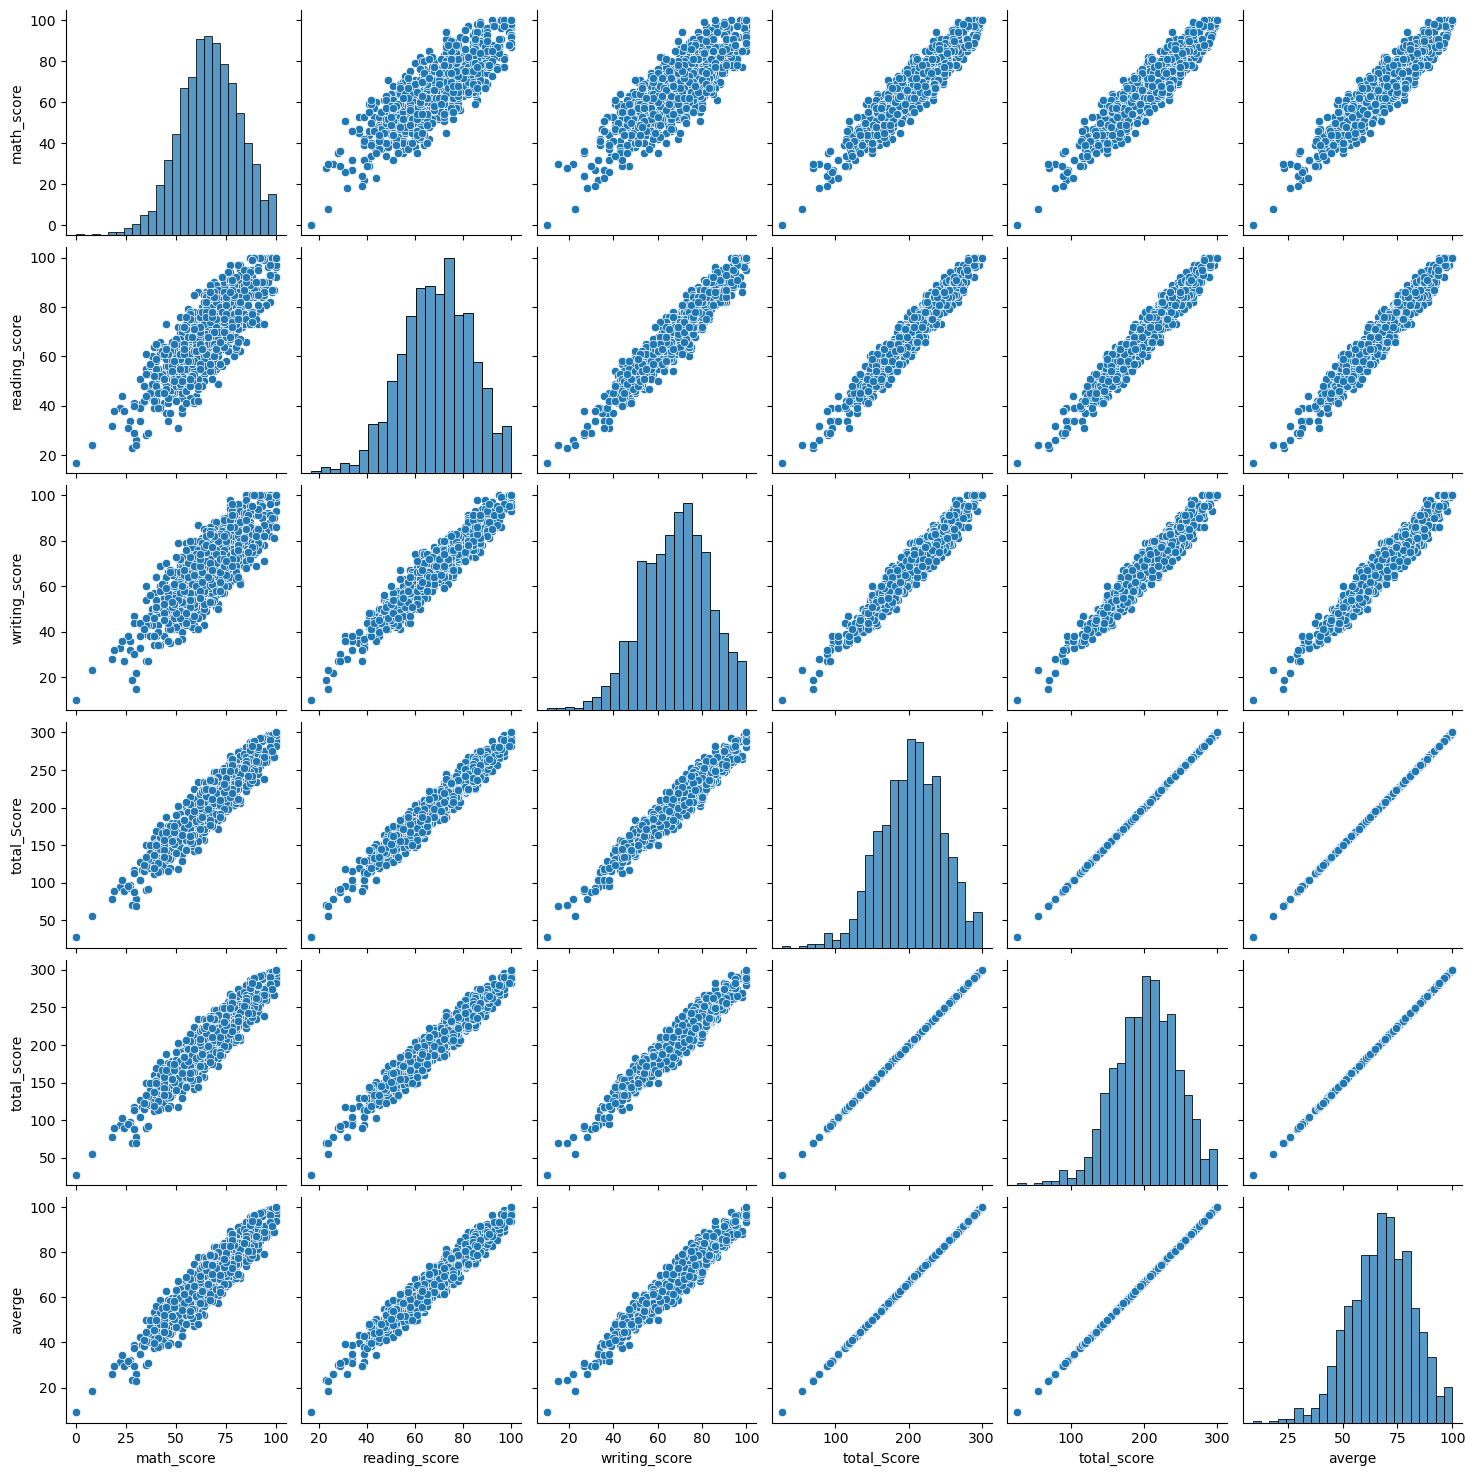

In [70]:
sns.pairplot(df)

<AxesSubplot: >

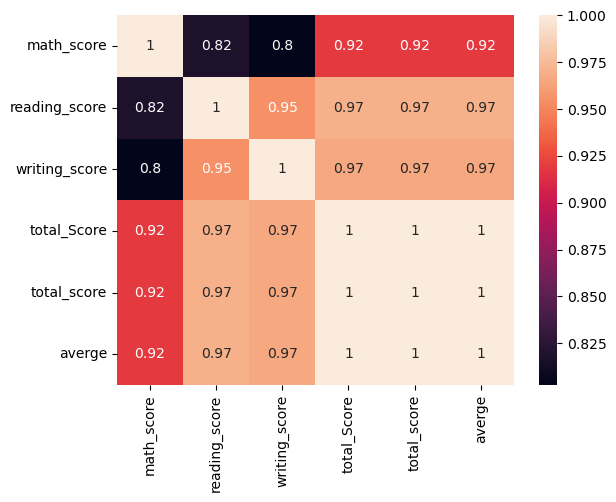

In [67]:
sns.heatmap(df.corr(),annot=True)